Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#Loading the dataset to a pandas dataframe
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
#first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
35737,38240,1.232390,0.122010,0.157352,0.261906,0.158523,0.273022,-0.143169,0.138664,-0.146805,...,-0.233618,-0.677894,0.052511,-0.816369,0.221553,0.158446,-0.018118,-0.003168,1.79,0.0
35738,38240,1.114040,0.571203,0.427035,2.442135,-0.020967,-0.501774,0.320237,-0.082876,-1.182685,...,0.028826,-0.032705,-0.056634,0.535225,0.540930,-0.025773,-0.035775,0.011219,24.99,0.0
35739,38241,1.057020,0.007895,0.239256,1.236048,0.032239,0.350868,0.023279,0.137328,0.037981,...,-0.043316,-0.022866,-0.155991,-0.283221,0.662538,-0.314989,0.027467,0.010613,53.96,0.0
35740,38241,-1.546226,0.693338,1.002815,-1.528992,0.294692,-0.464031,0.264880,0.307358,0.022915,...,-0.176713,-0.164637,0.197999,-0.463070,-0.118578,0.739989,0.043625,-0.140629,0.76,0.0
35741,38241,-0.231062,0.243033,1.071749,-0.324598,-0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#dataset informations

In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35742 entries, 0 to 35741
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    35742 non-null  int64  
 1   V1      35742 non-null  float64
 2   V2      35742 non-null  float64
 3   V3      35742 non-null  float64
 4   V4      35742 non-null  float64
 5   V5      35742 non-null  float64
 6   V6      35741 non-null  float64
 7   V7      35741 non-null  float64
 8   V8      35741 non-null  float64
 9   V9      35741 non-null  float64
 10  V10     35741 non-null  float64
 11  V11     35741 non-null  float64
 12  V12     35741 non-null  float64
 13  V13     35741 non-null  float64
 14  V14     35741 non-null  float64
 15  V15     35741 non-null  float64
 16  V16     35741 non-null  float64
 17  V17     35741 non-null  float64
 18  V18     35741 non-null  float64
 19  V19     35741 non-null  float64
 20  V20     35741 non-null  float64
 21  V21     35741 non-null  float64
 22

In [ ]:
#Checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
#Removing null values
credit_card_data = credit_card_data.dropna()
print(credit_card_data.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
#distribution of legit transactions and Fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    35638
1.0      103
Name: Class, dtype: int64

This Dataset is highly unbalanced.

0---> Normal transaction
1---> Fraudulent transaction


In [ ]:
#separating the data for analysis
legit=credit_card_data[credit_card_data.Class == 0]
fraud=credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(35638, 31)
(103, 31)


In [ ]:
#Statistical Measures of the data
legit.Amount.describe()

count    35638.000000
mean        84.185241
std        227.223359
min          0.000000
25%          7.000000
50%         22.000000
75%         76.000000
max       7879.420000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     103.000000
mean       90.471165
std       247.173335
min         0.000000
25%         1.000000
50%         3.760000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
# Compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,24007.013890,-0.186593,0.055909,0.752026,0.179227,-0.201556,0.102516,-0.094806,0.021671,0.268769,...,0.043058,-0.032782,-0.112858,-0.040645,0.008169,0.135484,0.021354,0.008491,0.003549,84.185241
1.0,20498.291262,-7.762676,5.838647,-10.957218,5.911555,-5.453798,-2.306085,-7.743100,3.867920,-2.961800,...,0.652319,0.628539,-0.354537,-0.362138,-0.234731,0.300023,0.180390,0.822304,0.102481,90.471165


Under-Sampling
Build a sample dataset containing similar distribution of normal transactions and Fraudulent transactions

Number of fraud transactions-> 103
Number of normal transactions -> 35638

In [ ]:
legit_sample= legit.sample(n=103)


Concatenating two dataframes


In [ ]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11388,19870,-0.724175,0.386449,2.796262,-1.673363,-0.403343,-0.386168,0.334569,-0.107970,2.587804,...,-0.112575,0.241108,-0.295603,0.343680,0.336740,-0.831692,-0.068872,-0.152894,11.85,0.0
31240,36277,-2.123929,1.580878,0.659287,-0.805582,0.314252,0.279060,-0.539700,-1.894753,-0.182802,...,2.127536,-1.531595,0.092159,-0.834054,-0.032312,0.010884,-0.211551,0.011781,0.89,0.0
32438,36803,1.469405,-0.630018,-0.224645,-1.012521,-0.311364,0.163855,-0.704066,0.075068,-0.486751,...,0.064952,0.092723,-0.170578,-1.334079,0.565477,-0.086818,0.009960,-0.004904,10.00,0.0
17229,28547,-0.547987,0.446931,1.604298,-0.265709,0.084956,-0.622799,1.890634,-1.257253,0.335431,...,-0.389592,-0.131873,0.038357,0.465719,-0.780598,0.687383,-0.607910,-0.711538,119.00,0.0
24902,33434,-0.627579,1.069886,2.045812,0.444938,0.110130,-0.976822,0.892607,-0.391201,-0.629118,...,-0.240854,-0.591215,-0.105919,0.682547,-0.021827,0.167043,-0.261657,-0.129118,1.98,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30442,35926,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,...,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,4.56,1.0
30473,35942,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,...,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46,1.0
30496,35953,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,...,1.194888,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,111.70,1.0
31002,36170,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,...,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,111.70,1.0
33276,37167,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    103
1.0    103
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,23894.000000,-0.224715,-0.013126,0.809153,0.083872,-0.319598,0.262597,0.053234,-0.33877,0.319503,...,0.020384,-0.165606,-0.083499,0.003853,-0.030428,0.131301,-0.042665,-0.029453,-0.022906,114.490485
1.0,20498.291262,-7.762676,5.838647,-10.957218,5.911555,-5.453798,-2.306085,-7.743100,3.86792,-2.961800,...,0.652319,0.628539,-0.354537,-0.362138,-0.234731,0.300023,0.180390,0.822304,0.102481,90.471165


Splitting the data into Features & Targets

In [ ]:
X= new_dataset.drop(columns='Class',axis=1)
Y= new_dataset['Class']

In [ ]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
11388  19870 -0.724175  0.386449  2.796262 -1.673363 -0.403343 -0.386168   
31240  36277 -2.123929  1.580878  0.659287 -0.805582  0.314252  0.279060   
32438  36803  1.469405 -0.630018 -0.224645 -1.012521 -0.311364  0.163855   
17229  28547 -0.547987  0.446931  1.604298 -0.265709  0.084956 -0.622799   
24902  33434 -0.627579  1.069886  2.045812  0.444938  0.110130 -0.976822   
...      ...       ...       ...       ...       ...       ...       ...   
30442  35926 -3.896583  4.518355 -4.454027  5.547453 -4.121459 -1.163407   
30473  35942 -4.194074  4.382897 -5.118363  4.455230 -4.812621 -1.224645   
30496  35953 -4.844372  5.649439 -6.730396  5.252842 -4.409566 -1.740767   
31002  36170 -5.685013  5.776516 -7.064977  5.902715 -4.715564 -1.755633   
33276  37167 -7.923891 -5.198360 -3.000024  4.420666  2.272194 -3.394483   

             V7        V8        V9  ...       V20       V21       V22  \
11388  0.3345

In [ ]:
print(Y)

11388    0.0
31240    0.0
32438    0.0
17229    0.0
24902    0.0
        ... 
30442    1.0
30473    1.0
30496    1.0
31002    1.0
33276    1.0
Name: Class, Length: 206, dtype: float64


Split data into Training data and Testing data


In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(206, 30) (164, 30) (42, 30)


*Model Training
Logistic Regression Model*

In [ ]:
model=LogisticRegression()

In [ ]:
#training the Logistic Regression Model with Training Data
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Model Evaluation & Accuracy Score**

In [ ]:
#Accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)


In [ ]:
print('Accuracy on Training data :',training_data_accuracy)

Accuracy on Training data : 0.9817073170731707


In [ ]:
#Accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy on Testing data :', test_data_accuracy)

Accuracy on Testing data : 0.9285714285714286


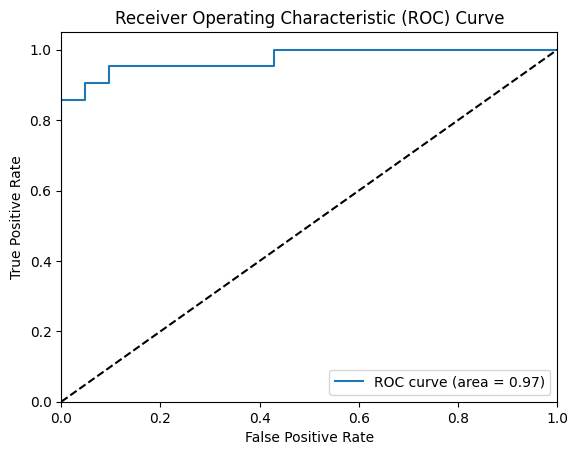

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_test, y_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()